In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# N은 데이터 갯수, D_in 뇌세포 갯수, H ,D_out 결론
N, D_in, H, D_out = 2, 100, 50, 1

In [23]:
x = np.random.randn(N, D_in)  # 인풋값
y = np.random.randn(N, D_out) # 정답지

print(x.shape)
print(y.shape)

(2, 100)
(2, 1)


In [24]:
w1 = np.random.randn(D_in, H) # 가중치 ( 뉴런 )
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [25]:
# 학습 코드
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(500):
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])
    
    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 3758.9443650636886
1 3703.034997395152
2 3647.9879330802623
3 3593.789002049526
4 3540.424291887578
5 3487.880142449746
6 3436.143140610204
7 3385.20011513802
8 3335.0381316975304
9 3285.644487969488
10 3237.0067088896453
11 3189.1125420014323
12 3141.9499529196355
13 3095.507120901978
14 3049.772434525552
15 3004.734487465327
16 2960.3820743718743
17 2916.704186845649
18 2873.690009505114
19 2831.3289161462826
20 2789.610465991136
21 2748.524400022551
22 2708.0606374034223
23 2668.2092719777265
24 2628.960568851375
25 2590.304961050695
26 2552.233046256555
27 2514.7355836121033
28 2477.8034906021794
29 2441.427840002623
30 2405.599856897481
31 2370.310915762616
32 2335.552537613718
33 2301.316387217312
34 2267.5942703629794
35 2234.378131195319
36 2201.6600496040946
37 2169.4322386711274
38 2137.6870421724534
39 2106.416932134405
40 2075.6145064422435
41 2045.2724865000291
42 2015.3837149404608
43 1985.9411533834575
44 1956.9378802422518
45 1928.3670885758715
46 1900.2220839868057
4

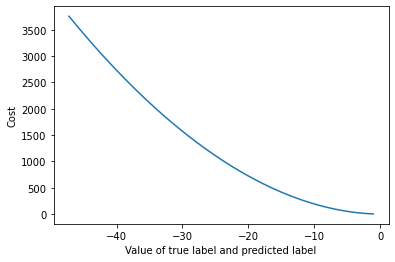

In [26]:
plt.plot(y_pred_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()

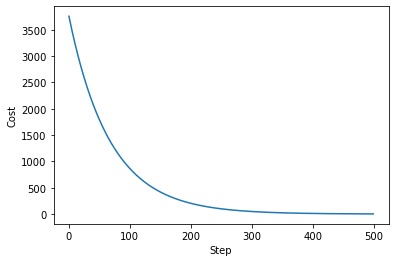

In [29]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Step')
plt.show()